In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

clv_df = pd.read_csv('../data/processed_data/predicted_clv.csv')

In [19]:
clv_df

,customer_id,recency,frequency,price_sum,price_mean,spend_90_total
0,1,-455,1,11.77,11.770000,4.852625
1,2,-444,2,89.00,44.500000,2.576313
2,3,-127,5,139.47,27.894000,0.887418
3,4,-110,4,100.50,25.125000,0.712400
4,5,-88,11,385.61,35.055455,2.322270
...,...,...,...,...,...,...
23565,23566,-372,1,36.00,36.000000,NaN
23566,23567,-372,1,20.97,20.970000,NaN
23567,23568,-344,3,121.70,40.566667,NaN
23568,23569,-372,1,25.74,25.740000,NaN


In [21]:
fig = px.histogram(clv_df, x='spend_90_total', nbins=50, title="Distribution of Predicted Spending (Next 90 Days)", 
                   labels={'spend_90_total': 'Predicted Spending ($)'}, color_discrete_sequence=['#636EFA'])
fig.update_layout(bargap=0.2)
fig.show()

In [23]:
fig = px.pie(clv_df, names='spend_90_flag', title="Proportion of Predicted Purchasers (Next 90 Days)",
             labels={'spend_90_flag': 'Purchase Flag'}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['customer_id', 'recency', 'frequency', 'price_sum', 'price_mean', 'spend_90_total'] but received: spend_90_flag

In [27]:
clv_df['recency'] = clv_df['recency'] * -1

In [28]:
fig = px.scatter(clv_df, x='frequency', y='spend_90_total', color='price_sum',
                 size='recency', title="Frequency vs. Predicted Spending (Color: Monetary, Size: Recency)",
                 labels={'spend_90_total': 'Predicted Spending ($)', 'Frequency': 'Frequency (Purchases)'})

fig.update_layout(coloraxis_colorbar=dict(title="Monetary Value ($)"))
fig.show()

### Customer Recency vs Frequency Analysis

Text(0, 0.5, 'Purchase Frequency')

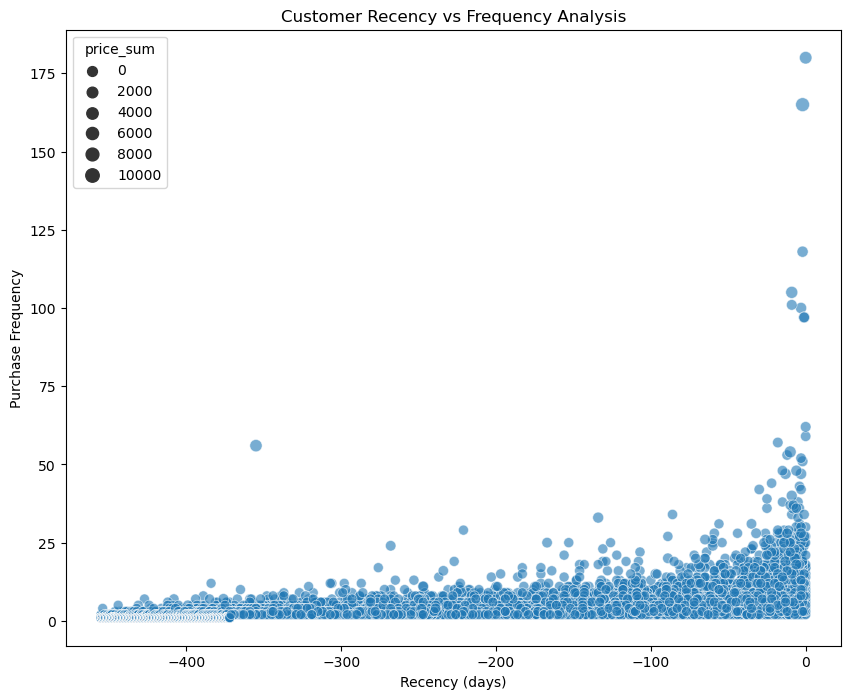

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clv_df[['recency', 'frequency', 'price_sum']], x='recency', y='frequency', size='price_sum', sizes=(50, 100), alpha=0.6)
plt.title('Customer Recency vs Frequency Analysis')
plt.xlabel('Recency (days)')
plt.ylabel('Purchase Frequency')

### Distribution of Customer Spending

Text(0, 0.5, 'Number of Cutomers')

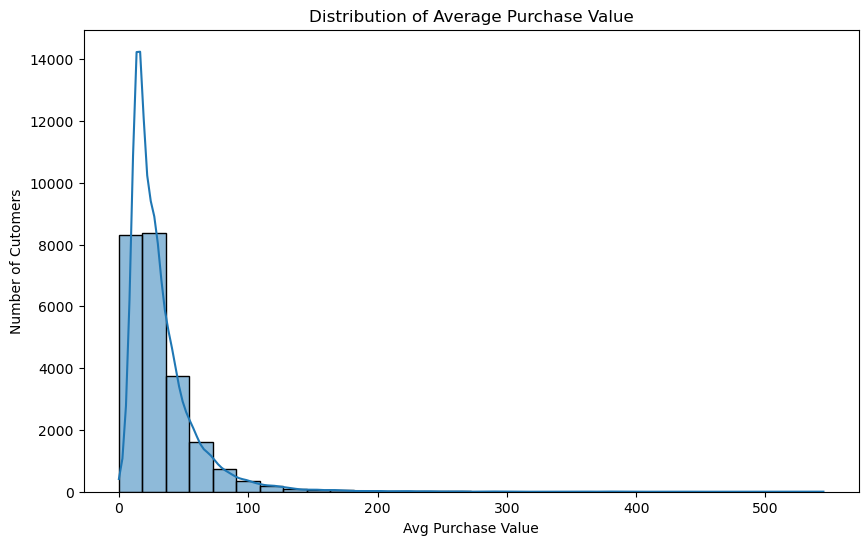

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clv_df, x='price_mean', bins=30, kde=True)
plt.title('Distribution of Average Purchase Value', fontsize=12)
plt.xlabel('Avg Purchase Value')
plt.ylabel('Number of Cutomers')

### Relationship Between Frequency and CLV

Text(0, 0.5, 'Predicted 90-day Spend')

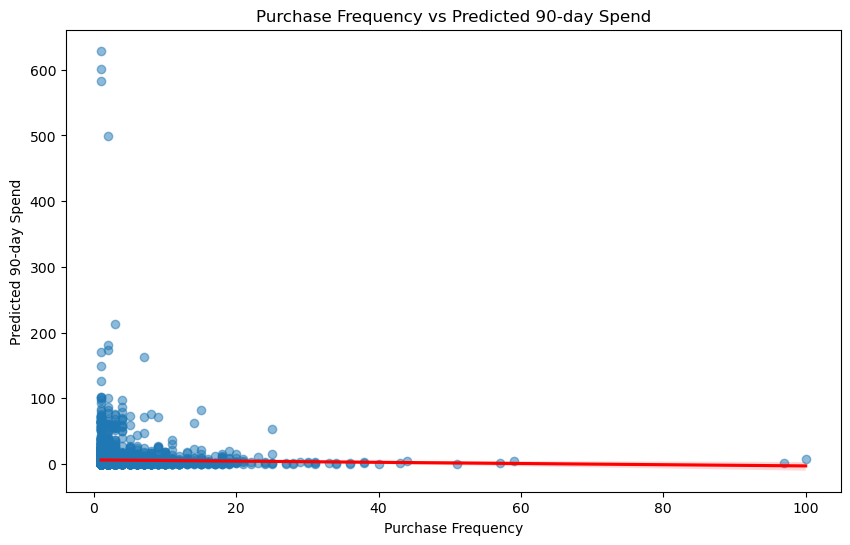

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=clv_df, x='frequency', y='spend_90_total', scatter_kws={'alpha':0.5}, \
             line_kws={'color':'red'})
plt.title('Purchase Frequency vs Predicted 90-day Spend', fontsize=12)
plt.xlabel('Purchase Frequency')
plt.ylabel('Predicted 90-day Spend')

### Customer Segmentation

Text(0, 0.5, 'Purchase Frequency')

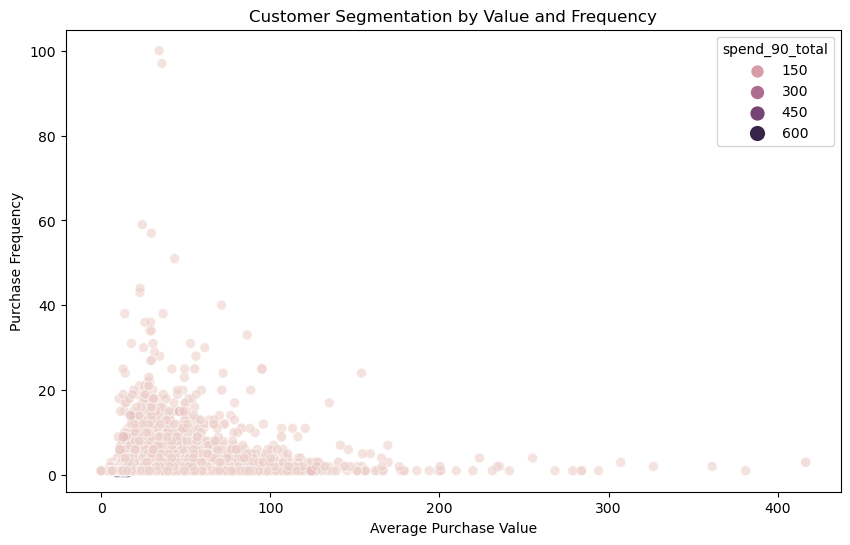

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clv_df, x='price_mean', y='frequency', hue='spend_90_total', size='spend_90_total' \
                , sizes=(50, 100), alpha=0.6)
plt.title('Customer Segmentation by Value and Frequency', fontsize=12)
plt.xlabel('Average Purchase Value')
plt.ylabel('Purchase Frequency')

In [29]:
corr_data = clv_df[['recency', 'frequency', 'price_sum', 'spend_90_total']].corr()

# Heatmap
fig = px.imshow(corr_data, text_auto=True, color_continuous_scale='Blues', 
                title="Correlation Heatmap of RFM Metrics and Predictions", 
                labels=dict(color="Correlation"))
fig.show()